# 1 Project_1 问答摘要与推理

## 1.1 问题描述
项目一是由百度AI技术生态部门提供，题目为“汽车大师问答摘要与推理”。

要求大家使用汽车大师提供的11万条（技师与用户的多轮对话与诊断建议报告数据）建立模型，模型需基于对话文本、用户问题、车型与车系，输出包含摘要与推断的报告文本，综合考验模型的归纳总结与推断能力。该解决方案可以节省大量人工时间，提高用户获取回答和解决方案的效率。

## 1.2 数据说明
对于每个用户问题"QID"，有对应文本形式的文本集合 D = "Brand", "Collection", "Problem", "Conversation"，要求阅读理解系统自动对D进行分析，输出相应的报告文本"Report"，其中包含摘要与推理。目标是"Report"可以正确、完整、简洁、清晰、连贯地对D中的信息作归纳总结与推理。

训练：所提供的训练集（82943条记录）建立模型，基于汽车品牌、车系、问题内容与问答对话的文本，输出建议报告文本

输出结果：对所提供的测试集（20000条记录）使用训练好的模型，输出建议报告的结果文件，通过最终测评得到评价分数

请提交一个CSV文件，包含QID和Prediction两个字段，分隔符为逗号(',')，请注意区分大小写。参考样例如下：

|QID|Prediction|
|-|-|
|Q103432|你的预测|
|Q100965|你的预测|

训练、测试数据


In [1]:
import pandas as pd

train_path = "/Users/vc3vc3/Documents/auto_master_qa/datasets/AutoMaster_TrainSet.csv"
test_path = "/Users/vc3vc3/Documents/auto_master_qa/datasets/AutoMaster_TestSet.csv"

In [2]:
df = pd.read_csv(train_path, encoding='utf-8')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82943 entries, 0 to 82942
Data columns (total 6 columns):
QID         82943 non-null object
Brand       81642 non-null object
Model       81642 non-null object
Question    82943 non-null object
Dialogue    82941 non-null object
Report      82873 non-null object
dtypes: object(6)
memory usage: 3.8+ MB


In [4]:
df.head()

QID Brand     Model                                           Question  \
0  Q1    奔驰     奔驰GL级                                方向机重，助力泵，方向机都换了还是一样   
1  Q2    奔驰      奔驰M级                                   奔驰ML500排气凸轮轴调节错误   
2  Q3    宝马  宝马X1(进口)  2010款宝马X1，2011年出厂，2.0排量，通用6L45变速箱，原地换挡位PRND车辆闯...   
3  Q4  Jeep       牧马人                              3.0V6发动机号在什么位置，有照片最好！   
4  Q5    奔驰      奔驰C级                       2012款奔驰c180怎么样，维修保养，动力，值得拥有吗   

                                            Dialogue  \
0  技师说：[语音]|车主说：新的都换了|车主说：助力泵，方向机|技师说：[语音]|车主说：换了...   
1  技师说：你这个有没有电脑检测故障代码。|车主说：有|技师说：发一下|车主说：发动机之前亮故障...   
2  技师说：你好，4缸自然吸气发动机N46是吧，先挂空档再挂其他档有没有闯动呢，变速箱油液位是否...   
3  技师说：右侧排气管上方，缸体上靠近变速箱|车主说：[图片]|车主说：是不是这个？|车主说：这...   
4  技师说：家庭用车的话，还是可以入手的|技师说：维修保养费用不高|车主说：12年的180市场价...   

                                      Report  
0                                       随时联系  
1                                       随时联系  
2  行驶没有顿挫的感觉，原地换挡有闯动，刹车踩重没有，这是力的限制的作用，应该没有问题  
3                            举起车辆，在左前轮这边的缸体上  
4           家庭用车可以入手的，维修保养价格还可以。车况好，价格合理可以入手

In [5]:
df.iloc[0]

QID                                                        Q1
Brand                                                      奔驰
Model                                                   奔驰GL级
Question                                  方向机重，助力泵，方向机都换了还是一样
Dialogue    技师说：[语音]|车主说：新的都换了|车主说：助力泵，方向机|技师说：[语音]|车主说：换了...
Report                                                   随时联系
Name: 0, dtype: object

## 面试 tips
Series：一种类似于一维数组的对象，是由一组数据(各种NumPy数据类型)以及一组与之相关的数据标签(即索引)组成。仅由一组数据也可产生简单的Series对象。注意：Series中的索引值是可以重复的。

DataFrame：一个表格型的数据结构，包含有一组有序的列，每列可以是不同的值类型(数值、字符串、布尔型等)，DataFrame即有行索引也有列索引，可以被看做是由Series组成的字典。

In [6]:
import numpy as np  

s = pd.Series([1, 2, 5, np.nan, 6, 8])  
type(s)

pandas.core.series.Series

In [7]:
data = [{'a':1,'b':2},{'a':1,'b':2,'c':3}]
df = pd.DataFrame(data,index = ['first','second'],columns = ['a','b','c','d'])
df

a  b    c   d
first   1  2  NaN NaN
second  1  2  3.0 NaN

# 2 如何完成项目

## 2.1 PaddlePaddle

## 2.2 组队

## 2.3 Github

# 3 TensorFlow ROADSHOW 分享

## 3.1 简介
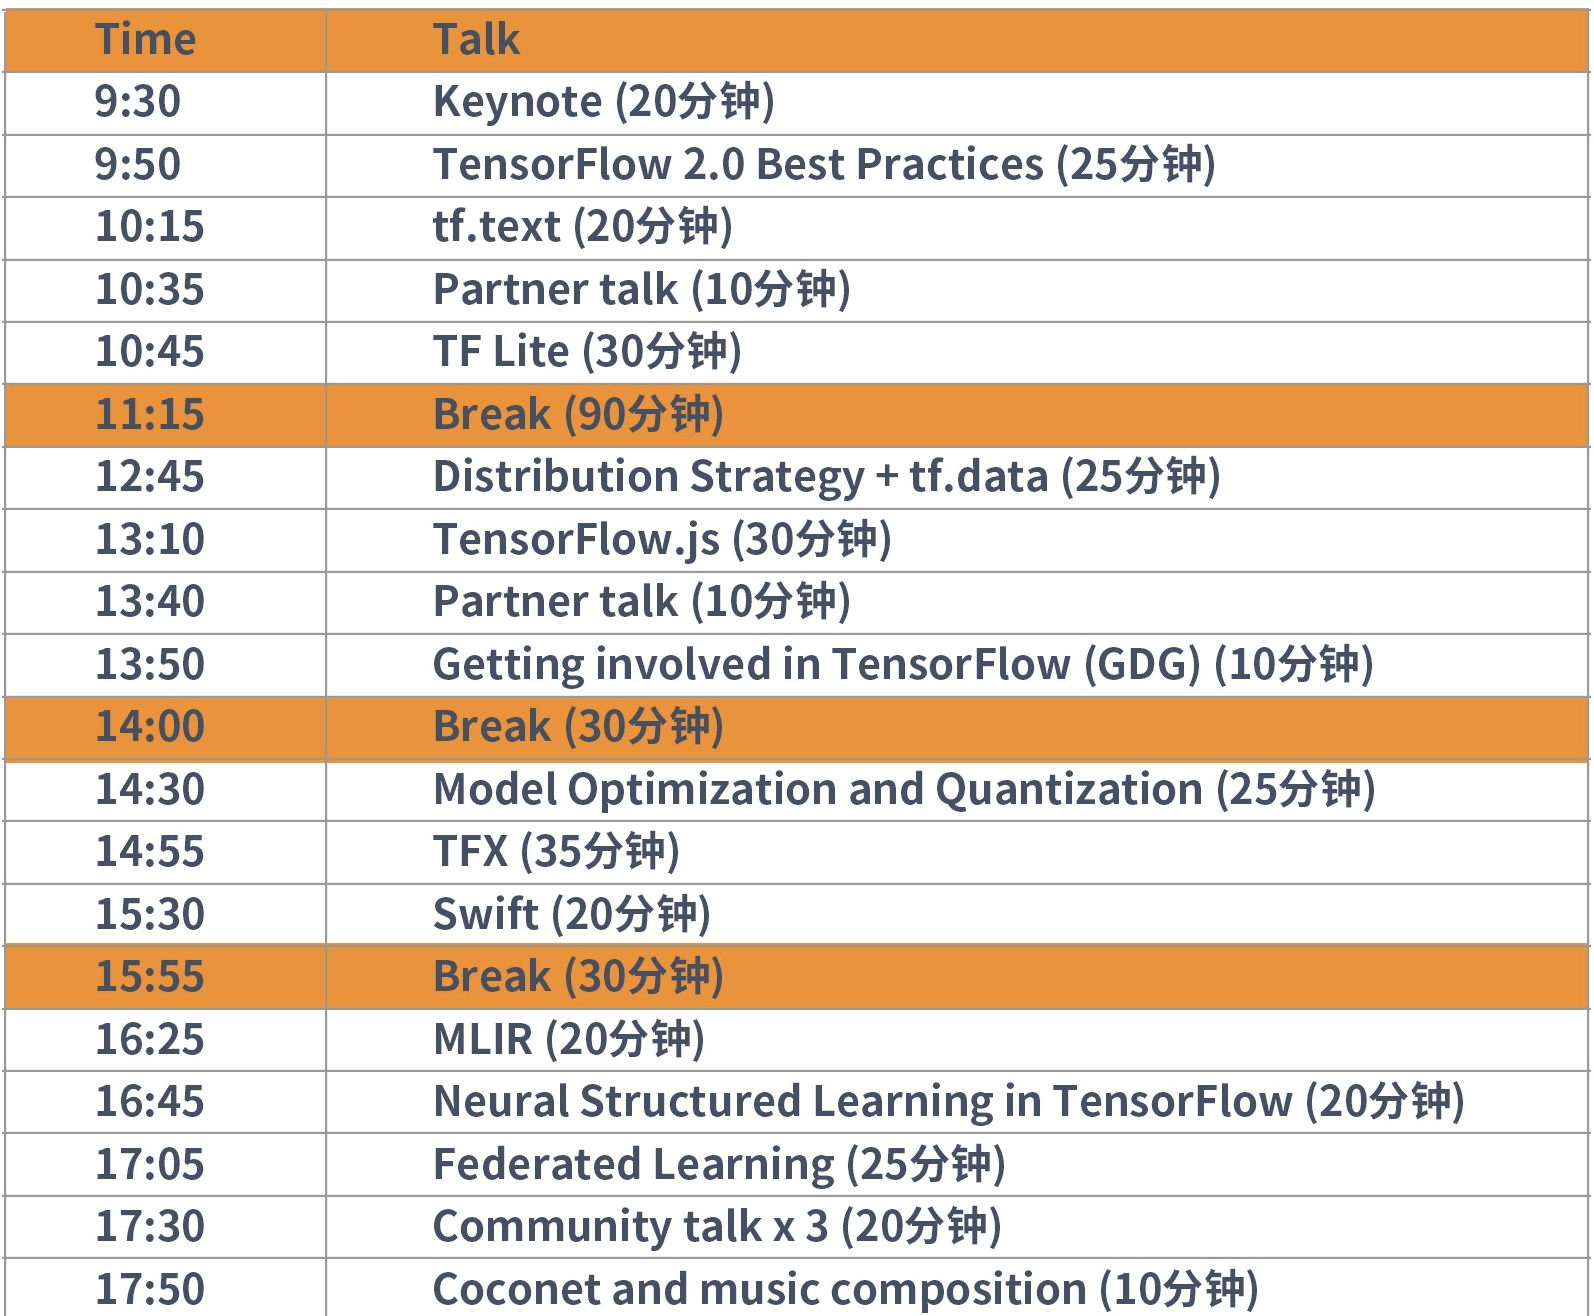

## 3.2 整体产品框架
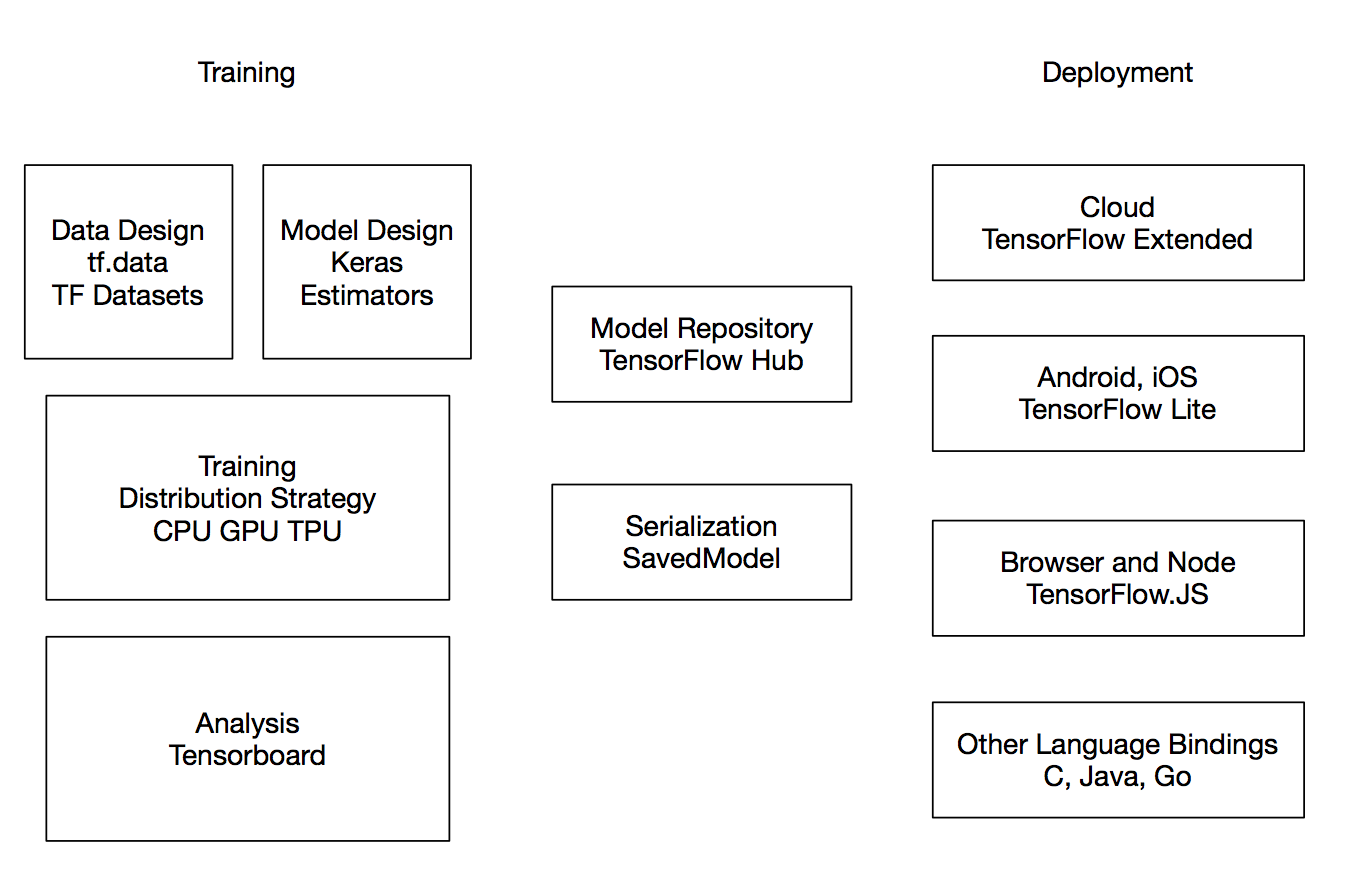

## 3.3 A brief summary of major changes

### 3.3.1 API Cleanup --- tf.keras

In [8]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

model = MyModel()

2.0.0-rc0


### 3.3.2 Eager execution

In [9]:
# TensorFlow 1.X
# outputs = session.run(f(placeholder), feed_dict={placeholder: input})
# TensorFlow 2.0
# outputs = f(input)
tf.executing_eagerly()

True

In [10]:
x = [[2.]]
m = tf.matmul(x, x)
print("hello, {}".format(m))

hello, [[4.]]


In [11]:
a = tf.constant([[1, 2],
                 [3, 4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [12]:
# in_a = tf.placeholder(dtype=tf.float32, shape=(2))
# in_b = tf.placeholder(dtype=tf.float32, shape=(2))

# def forward(x):
#   with tf.variable_scope("matmul", reuse=tf.AUTO_REUSE):
#     W = tf.get_variable("W", initializer=tf.ones(shape=(2,2)),
#                         regularizer=tf.contrib.layers.l2_regularizer(0.04))
#     b = tf.get_variable("b", initializer=tf.zeros(shape=(2)))
#     return W * x + b

# out_a = forward(in_a)
# out_b = forward(in_b)

# reg_loss = tf.losses.get_regularization_loss(scope="matmul")

# with tf.Session() as sess:
#   sess.run(tf.global_variables_initializer())
#   outs = sess.run([out_a, out_b, reg_loss],
#                 feed_dict={in_a: [1, 0], in_b: [0, 1]})

In [13]:
# W = tf.Variable(tf.ones(shape=(2,2)), name="W")
# b = tf.Variable(tf.zeros(shape=(2)), name="b")

# @tf.function
# def forward(x):
#   return W * x + b

# out_a = forward([1,0])
# print(out_a)

## 3.4 TF.Text

+ 使用Ragged Tensors来代表文字
+ 文本预处理在您的tensorflow input和serving pipeline
+ 不用写出中间文件 - 直接使用原本训练数据
+ Tokenizer API - 支持tokenization（分词处理）直接在tensorflow的数据流图


In [14]:
import tensorflow_text as text

tokenizer = text.UnicodeScriptTokenizer()
(tokens, offset_starts, offset_limits) = tokenizer.tokenize_with_offsets(['everything not saved will be lost.', u'Sad☹'.encode('UTF-8')])
print(tokens.to_list())
print(offset_starts.to_list())
print(offset_limits.to_list())

W0911 18:43:38.679056 140735502574464 deprecation.py:323] From /Users/vc3vc3/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/util/dispatch.py:180: batch_gather (from tensorflow.python.ops.array_ops) is deprecated and will be removed after 2017-10-25.
Instructions for updating:
`tf.batch_gather` is deprecated, please use `tf.gather` with `batch_dims=-1` instead.
W0911 18:43:38.689173 140735502574464 deprecation.py:323] From /Users/vc3vc3/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/array_ops.py:1486: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[[b'everything', b'not', b'saved', b'will', b'be', b'lost', b'.'], [b'Sad', b'\xe2\x98\xb9']]
[[0, 11, 15, 21, 26, 29, 33], [0, 3]]
[[10, 14, 20, 25, 28, 33, 34], [3, 6]]


In [15]:
tokenizer = text.WhitespaceTokenizer()
tokens = tokenizer.tokenize(['Everything not saved will be lost.', u'Sad☹'.encode('UTF-8')])

# Ngrams, in this case bi-gram (n = 2)
bigrams = text.ngrams(tokens, 2, reduction_type=text.Reduction.STRING_JOIN)

print(bigrams.to_list())

[[b'Everything not', b'not saved', b'saved will', b'will be', b'be lost.'], []]


## 3.5 TF Lite

TensorFlow --> Saved Model --> TF Lite转换工具 --> TF Lite模型

## 3.6 Distribute Strategy and tf.data

+ 用Keras / Estimator API来分布式训练模型
+ 用custom training loop来分布式训练模型

In [16]:
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

W0911 18:43:43.597754 140735502574464 cross_device_ops.py:1209] There is non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.


Number of devices: 1


In [17]:
"""
with strategy.scope():
    model = tf.keras.applications.ResNet50()
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
    model.compile(..., optimizer=optimizer)
    model.fit(train_dataset, epochs=10)
"""

'\nwith strategy.scope():\n    model = tf.keras.applications.ResNet50()\n    optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)\n    model.compile(..., optimizer=optimizer)\n    model.fit(train_dataset, epochs=10)\n'

流水线将训练步骤的预处理和模型执行过程重叠到一起。当加速器正在执行第 N 个训练步时，CPU 正在准备第 N+1 步的数据。这样做不仅可以最大限度地缩短训练的单步用时（而不是总用时），而且可以缩短提取和转换数据所需的时间。

如果不使用流水线，CPU 和 GPU/TPU 在大部分时间都处于空闲状态：
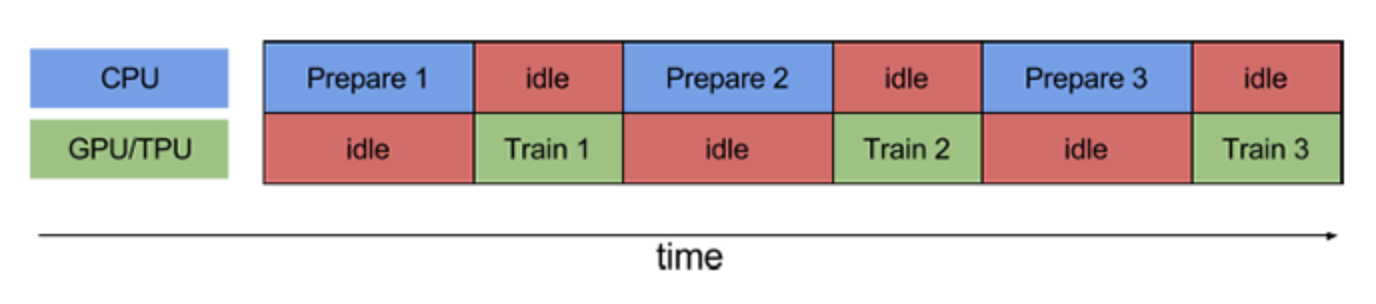
使用流水线可显著减少空闲时间：
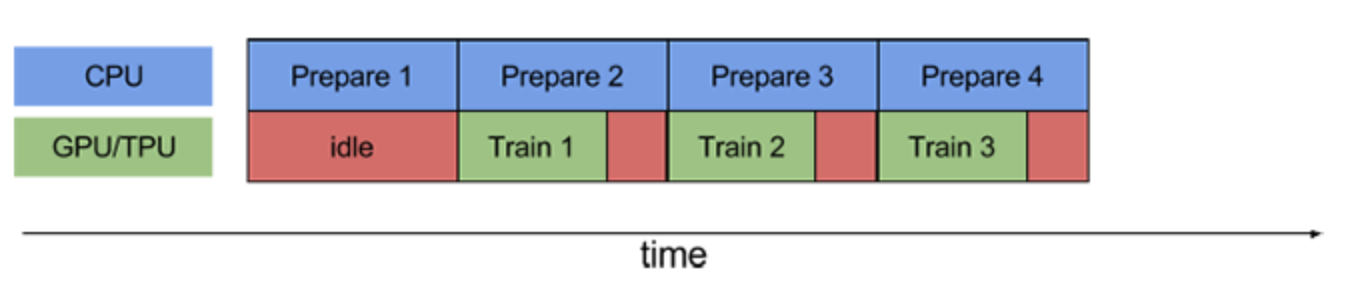

In [18]:
"""
# The TFRecord format is a simple format for storing a sequence of binary records.
def prepocess(record):
    ...
    dataset = tf.data.Dataset.list_files(".../*.tfrecord")
    dataset = dataset.interleave(TFRecordDataset, num_parallel_calls=Z)
    dataset = dataset.map(preprocess, num_parallel_calls=Y)
    dataset = dataset.batch(batch_size=32)
    dataset = dataset.prefetch(buffer_size=X)
    
    model = ...
    model.fit(dataset, epochs=10)
"""

'\n# The TFRecord format is a simple format for storing a sequence of binary records.\ndef prepocess(record):\n    ...\n    dataset = tf.data.Dataset.list_files(".../*.tfrecord")\n    dataset = dataset.interleave(TFRecordDataset, num_parallel_calls=Z)\n    dataset = dataset.map(preprocess, num_parallel_calls=Y)\n    dataset = dataset.batch(batch_size=32)\n    dataset = dataset.prefetch(buffer_size=X)\n    \n    model = ...\n    model.fit(dataset, epochs=10)\n'

## 3.7 TensorFlow Extended（TFX）

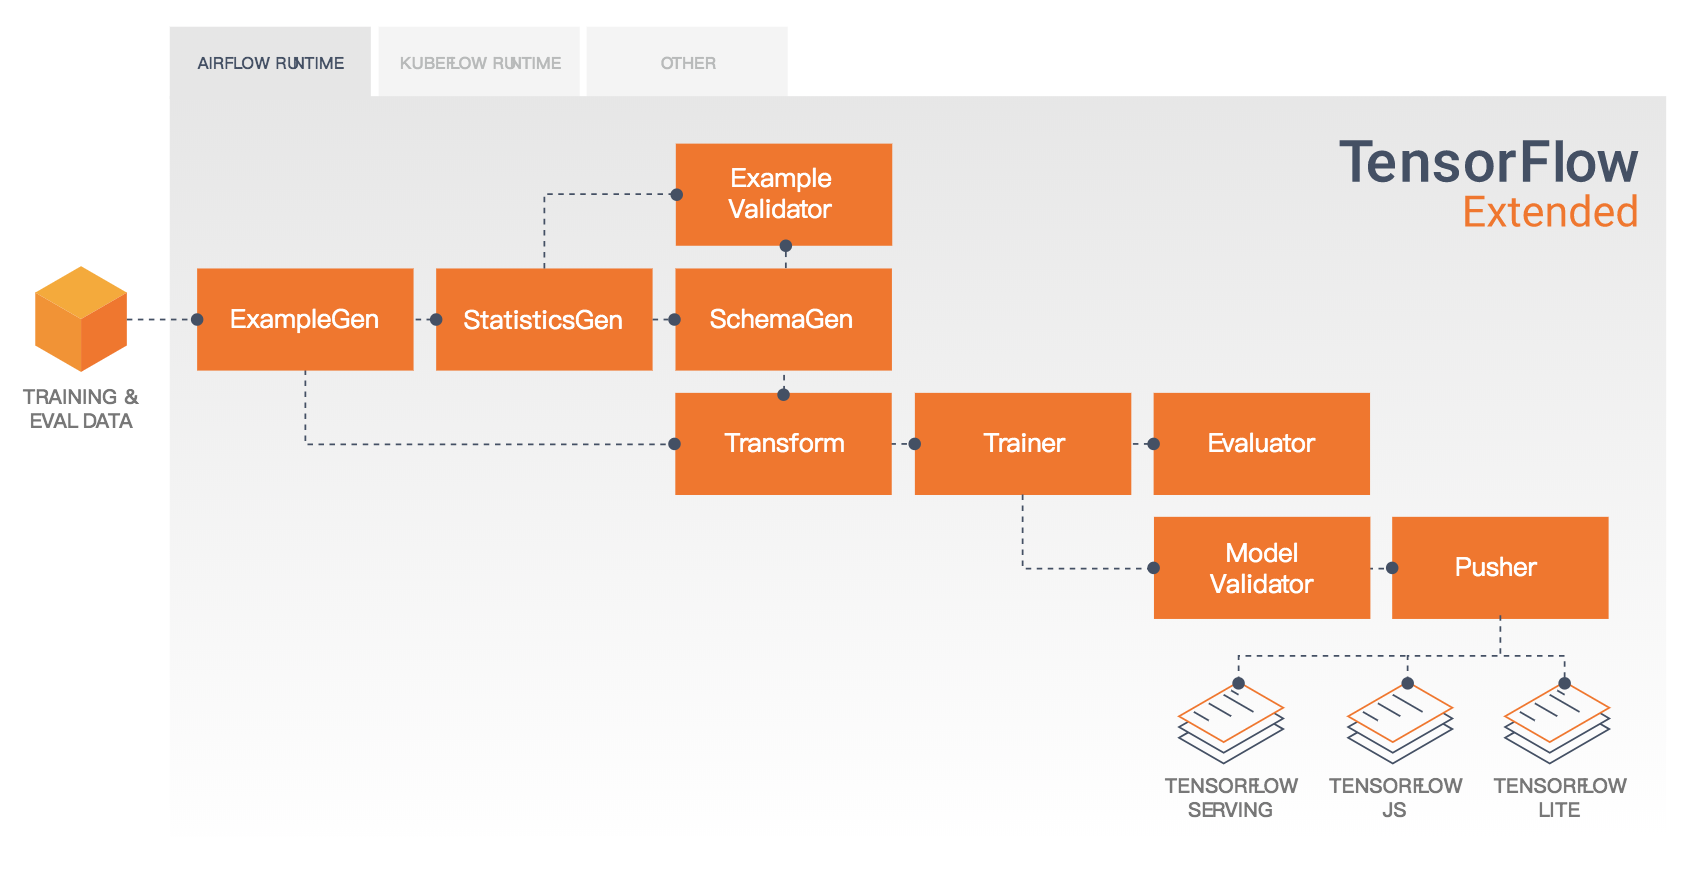

Docker容器：一键部署
$ docker run -p 8501:8501 \
    -v '/path/savedmodel':/models/aaa_model
    -e MODEL_NAME=aaa_model -t tensorflow/serving

## 3.8 Neural Structured Learning in TensorFlow

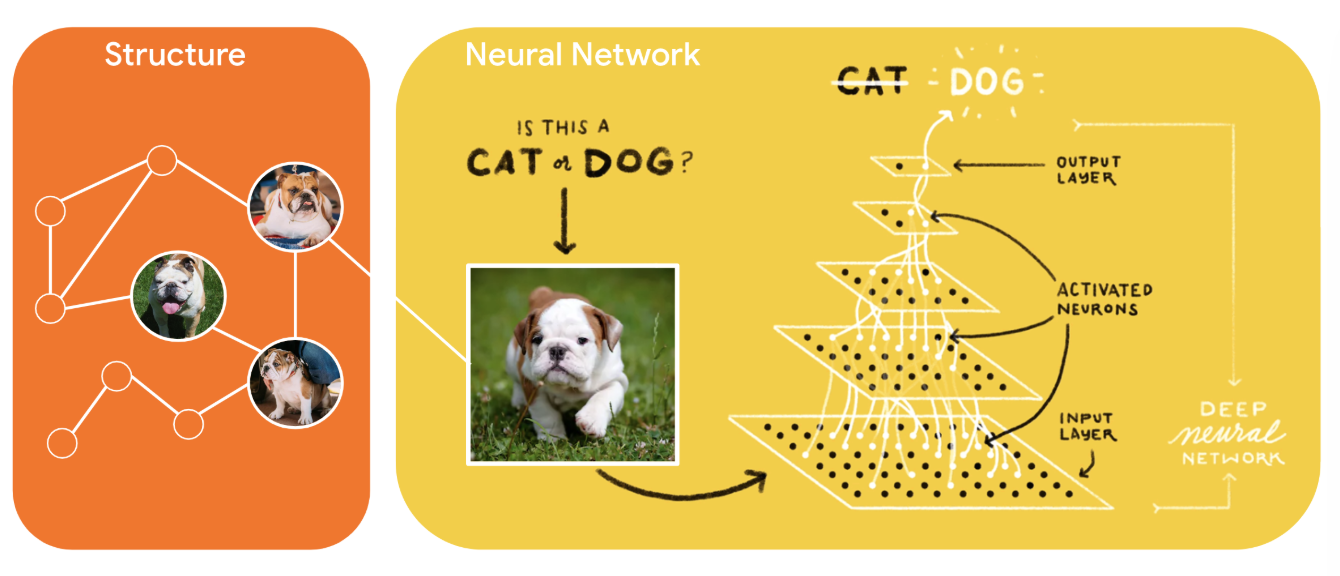

通过结构特征“正则化”
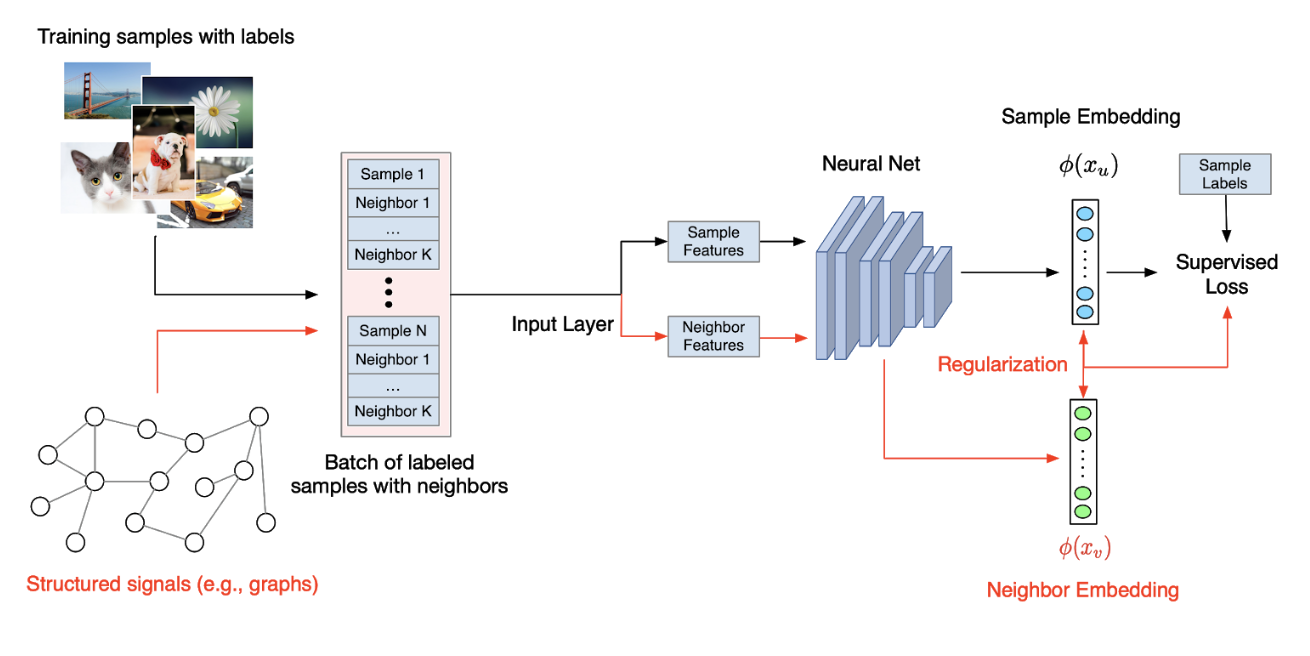

In [19]:
import neural_structured_learning as nsl

# Prepare data.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a base model -- sequential, functional, or subclass.
model = tf.keras.Sequential([
    tf.keras.Input((28, 28), name='feature'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Wrap the model with adversarial regularization.
adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.05)
adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)

# Compile, train, and evaluate.
adv_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
adv_model.fit({'feature': x_train, 'label': y_train}, batch_size=32, epochs=5)
adv_model.evaluate({'feature': x_test, 'label': y_test})

W0911 18:43:54.144376 140735502574464 training_utils.py:1347] Output output_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to output_1.


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3180 - sparse_categorical_crossentropy: 0.2600 - sparse_categorical_accuracy: 0.9253 - adversarial_loss: 0.2899 12s - loss: 0.8557 - sparse_categorical_crossentropy: 0.7065 - sparse_categorical_accuracy: 0.807
Epoch 2/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1399 - sparse_categorical_crossentropy: 0.1129 - sparse_categorical_accuracy: 0.9667 - adversarial_loss: 0.1347s - loss: 0.1506 - sparse_categorical_crossentropy: 0
Epoch 3/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0970 - sparse_categorical_crossentropy: 0.0778 - sparse_categorical_accuracy: 0.9764 - adversarial_loss: 0.0961
Epoch 4/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0741 - sparse_categorical_crossentropy: 0.0590 - sparse_categorical_accuracy: 0.9816 - adversarial_loss: 0.0754
Epoch 5/5
60000/60000 [===========================

[0.08876452209870331, 0.0706591, 0.9774, 0.09000405]

# 4 分词

## 4.1 jieba

+ jieba.cut 方法接受三个输入参数: 需要分词的字符串；cut_all 参数用来控制是否采用全模式；HMM 参数用来控制是否使用 HMM 模型
+ jieba.cut_for_search 方法接受两个参数：需要分词的字符串；是否使用 HMM 模型。该方法适合用于搜索引擎构建倒排索引的分词，粒度比较细待分词的字符串可以是 unicode 或 UTF-8 字符串、GBK 字符串。注意：不建议直接输入 GBK 字符串，可能无法预料地错误解码成 UTF-8
+ jieba.cut 以及 jieba.cut_for_search 返回的结构都是一个可迭代的 generator，可以使用 for 循环来获得分词后得到的每一个词语(unicode)，或者用
+ jieba.lcut 以及 jieba.lcut_for_search 直接返回 list
+ jieba.Tokenizer(dictionary=DEFAULT_DICT) 新建自定义分词器，可用于同时使用不同词典。jieba.dt 为默认分词器，所有全局分词相关函数都是该分词器的映射。


In [20]:
import jieba
import jieba.posseg as pseg

In [21]:
seg_list = jieba.cut('我来到北京清华大学',cut_all=True)
print('Full Mode:' + '/'.join(seg_list)) #全模式

seg_list = jieba.cut('我来到北京清华大学',cut_all=False)
print('Default Mode:' + '/'.join(seg_list)) # 精确模式

seg_list = jieba.cut('我来到北京清华大学')
print(', '.join(seg_list)) # 默认为精确模式

seg_list = jieba.cut_for_search('小明硕士毕业于中国科学院计算所，后在日本京都大学深造') # 搜索引擎模式
print('Search Engin Mode'+', '.join(seg_list))

Building prefix dict from the default dictionary ...
I0911 18:44:37.842682 140735502574464 __init__.py:111] Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/q_/7y6gj4r523v3y2sz09f17h980000gn/T/jieba.cache
I0911 18:44:37.844624 140735502574464 __init__.py:131] Loading model from cache /var/folders/q_/7y6gj4r523v3y2sz09f17h980000gn/T/jieba.cache
Loading model cost 0.602 seconds.
I0911 18:44:38.446563 140735502574464 __init__.py:163] Loading model cost 0.602 seconds.
Prefix dict has been built succesfully.
I0911 18:44:38.447826 140735502574464 __init__.py:164] Prefix dict has been built succesfully.


Full Mode:我/来到/北京/清华/清华大学/华大/大学
Default Mode:我/来到/北京/清华大学
我, 来到, 北京, 清华大学
Search Engin Mode小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


In [22]:
words = pseg.cut('我爱北京天安门')
for w, f in words:
    print(("word: %s\tflag: %s")%(w,f))

word: 我	flag: r
word: 爱	flag: v
word: 北京	flag: ns
word: 天安门	flag: ns


# 5 Word2Vec


## softmax

In [23]:
import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [24]:
softmax([2, 1])

array([0.73105858, 0.26894142])

## word2vec 搭建 tensorflow 1.12

In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
from collections import Counter

from sklearn.datasets import fetch_20newsgroups
print(tf.__version__)

%matplotlib inline

2.0.0-rc0


### 数据集2 
数据处理自`sklearn 20newsgroups`

In [26]:
"""skip-gram模型数据"""


def generate_samples(corpus, vocab, vocab_freq):
    """使用子采样生成数据"""
    LEN = len(corpus)
    rate = 0.001
    samples = []
    
    for i,center_word in enumerate(corpus):
        # 非词汇表词过滤
        if i-2<0 or i+2>LEN-1 \
            or center_word is None \
            or center_word == vocab['.']:
            continue
        else:
            condedate_words = [center_word, corpus[i-1], corpus[i-2], corpus[i+1], corpus[i+2]]
            condedate_words = [word for word in condedate_words if word is not None]
            freqs = np.array([vocab_freq[word] for word in condedate_words])
            p_keeps = (np.sqrt(freqs/rate) + 1) * rate / freqs
            p_keeps[p_keeps>1] = 1
            
            if  random.random() > p_keeps[0]: 
                # center_word 子采样
                # print('center_word %d 舍弃' % center_word)
                continue
            else:
                # target_word 子采样
                sampled_words = [(center_word, condedate_words[i+1]) for i,p in enumerate(p_keeps[1:]) if random.random()<p]
                samples.extend(sampled_words)
                
    return samples

def load_data():
    """加载数据"""
    
    newsgroup = fetch_20newsgroups(data_home='/mnt/d/Dataset/20newgroups/',
                          subset='all',
                          remove=('headers', 'footers', 'quotes'))
    
    corpus = ''.join(newsgroup.data).lower().split()
    counter_corpus = Counter(corpus)

    words_count = sorted(counter_corpus.items(), key=lambda kv:kv[1], reverse=True)
    stop_words = '? ! @ # $ % ^ & * ( ) [ ] { } > < = - + ~ ` --- (i (or / ; ;\' $1 |> \
                    --------- -------------------------------------------------------------------------- \
                    ========================= \
                    0 1 2 3 4 5 6 7 8 9 13 15 30 24 20 "a" tk> 95 45'
    
    index = 0
    vocab_words, vocab, reverse_vocab, vocab_count, vocab_freq,= [],{},{},{},{}
    for (k,v) in words_count:
        if k in stop_words.split() or v < 15: continue
        # 单词列表
        vocab_words.append(k)
        # 单词:id
        vocab[k] = index
        # id:单词
        reverse_vocab[index] = k
        # 单词:频次
        vocab_count[k] = v
        # 单词:频率
        vocab_freq[index] = v/len(corpus)
        index += 1

    print('字典长度:', len(vocab.keys()))
    print(vocab_words[:10])
    
    corpus_int = [vocab.get(word) for word in corpus]
    # 非字典词语占比
    print('非字典词语占比%.2f' % (corpus_int.count(None)/len(corpus_int)*100))
    
    samples = generate_samples(corpus_int, vocab, vocab_freq) # version2 实现子采样 传入原始语料(word list)而不是int
    print('样本数量:',len(samples))
    
    return samples, list(vocab_count.values()), vocab

In [27]:
samples,counts,vocabulary = load_data()
reverse_vocab = {v:k for k,v in vocabulary.items()}
center_words = [x for (x,y) in samples]
target_words = [y for (x,y) in samples]

PermissionError: [Errno 13] Permission denied: '/mnt'

In [ ]:
emb_dim = 300
vocab_size = len(vocabulary)
batch_size = 128
num_samples = 5
epoches = 1000
top_n = 10
val_data = ['geometric', 'monitor', 'mouse', 'linux', 'microsoft', 
                           'engine', 'factory', 'storage', 'billion', 'article']


def forward(vocab, counts):
    """Build the graph for the forward pass."""
    
    examples = tf.placeholder(tf.int32, shape=[batch_size], name='input')
    labels = tf.placeholder(tf.int32, shape=[batch_size, 1], name='label')
    
    # Embedding Weight [vocab_size, emb_dim]
    init_width = 0.5 / emb_dim
    emb = tf.Variable(
        tf.random_uniform(
            [vocab_size, emb_dim], -init_width),
        name='emb')
    
    # Softmax Weight [vocab_size, emb_dim].Transposed.
    sm_w_t = tf.Variable(
        tf.zeros([vocab_size, emb_dim]),
        name='sm_w_t')
    
    # Softmax bias [vocab_size]
    sm_b = tf.Variable(tf.zeros([vocab_size]), name='sm_b')
    
    # NCE loss
    labels_matrix = tf.reshape(
        tf.cast(labels, dtype=tf.int64),
        [batch_size, 1])
    
    # Negative sampling
    sampled_ids, _, _ = (tf.nn.fixed_unigram_candidate_sampler(
        true_classes=labels_matrix,
        num_true=1,
        num_sampled=num_samples,
        unique=True,
        range_max=vocab_size,
        distortion=0.75,
        unigrams=counts))
    
    # Embeddings for examples: [batch_size, emb_dim]
    example_emb = tf.nn.embedding_lookup(emb, examples)
    
    # Weights for labels: [batch_size, emb_dim]
    # 不需要计算所有的logistic 仅计算正确单词的logistic进行更新
    true_w = tf.nn.embedding_lookup(sm_w_t, labels)
    true_b = tf.nn.embedding_lookup(sm_b, labels)
    
    # Weights for sampled ids: [num_sampled, emb_dim]
    sampled_w = tf.nn.embedding_lookup(sm_w_t, sampled_ids)
    # Biases for sampled ids: [num_sampled, 1]
    sampled_b = tf.nn.embedding_lookup(sm_b, sampled_ids)
    
    # True logits: [batch_size, 1]
    true_logits = tf.reduce_sum(tf.multiply(example_emb, true_w), 1) + true_b
    
    # Sampled logits: [batch_size, numsampled]
    sampled_b_vec = tf.reshape(sampled_b, [num_samples])
    sampled_logits = tf.matmul(example_emb, 
                               sampled_w, 
                               transpose_b=True) + sampled_b_vec
    
    # Similarity option
    norm = tf.sqrt(tf.reduce_sum(tf.square(emb), axis=1, keepdims=True))
    norm_emb = emb / norm
    
    
    val_int = tf.constant([vocab[word] for word in val_data], dtype=tf.int32)
    val_emb = tf.nn.embedding_lookup(norm_emb, val_int)
    similarity = tf.matmul(val_emb, tf.transpose(norm_emb))
    
    return examples, labels, true_logits, sampled_logits, similarity

def nec_loss(true_logits, sampled_logits):
    """Build the graph for the NCE loss."""

    # cross-entropy (logits, labels)
    true_xent = tf.nn.sigmoid_cross_entropy_with_logits(
        labels=tf.ones_like(true_logits), logits=true_logits)
    
    sampled_xent = tf.nn.sigmoid_cross_entropy_with_logits(
        labels=tf.zeros_like(sampled_logits), logits=sampled_logits)
    
    # NCE-loss is sum of the true and noise (sampled words)
    # contributions, average over the batch.
    nce_loss_tensor = (tf.reduce_sum(true_xent) + 
                       tf.reduce_sum(sampled_xent)) / batch_size
    
    return nce_loss_tensor

def optimize(loss):
    """Build the graph to optimize the loss function."""
    optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
    return optimizer

def train(center_words, target_words, vocab, reverse_vocab, counts):
    """Build the graph for the full model."""
    
    tf.reset_default_graph()
    
    examples, labels, true_logits, sampled_logits, similarity = forward(vocab, counts)
    loss = nec_loss(true_logits, sampled_logits)
    optimizer = optimize(loss)
    
    saver = tf.train.Saver()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        batch_all = len(center_words) // batch_size
        print('Batch_all:', batch_all, 'Batch_size:', batch_size, 'Samples:', len(center_words))
        for epoch in range(epoches):
            for num in range(batch_all):
                x_batch = center_words[num*batch_size: batch_size*(num+1)]
                y_batch = target_words[num*batch_size: batch_size*(num+1)]

                y_batch = np.array(y_batch).reshape(-1, 1)

                _, l = sess.run([optimizer, loss], feed_dict={
                    examples : x_batch,
                    labels : y_batch
                })
                if num % 100 == 0:
                    print('Epoch:',epoch,' Iter', num, 'loss:', l)
                if num % 1000 == 0:
                    sim = similarity.eval()
                    for i,j in enumerate(val_data):
                        nearest_n = (-sim[i, :]).argsort()[1:top_n+1]
                        logg = 'Nearest to %s is :' % j
                        for ind,ner_int_word in enumerate(nearest_n):
                            nearest_word = reverse_vocab[ner_int_word]
                            logg = '%s  %s'%(logg,nearest_word)
                        print(logg)
        
        save_path = saver.save(session, "./checkpoints/word2vec_model_20news.ckpt")

In [ ]:
train(center_words, target_words, vocabulary, reverse_vocab, list(counts))

## word2vec搭建 tf2.0-keras

In [28]:
sentences = [
    "king is a strong man", 
    "queen is a wise woman", 
    "boy is a young man", 
    "girl is a young woman", 
    "prince is a young king", 
    "princess is a young queen", 
    "man is strong", 
    "woman is wise", 
    "prince is a boy who will be king", 
    "princess is a girl who will be queen"
]

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random

In [30]:
def get_useful_words(sentence):
    all_words = sentence.split()
    all_distinct_words = set(all_words)
    useless_words = {"the", "is", "be", "will", "a", "becomes", "who"}
    all_distinct_useful_words = [word for word in all_distinct_words if word not in useless_words]
#     all_distinct_useful_words = list(filter(lambda a: a not in useless_words, all_distinct_words))
    return all_distinct_useful_words

# take in a sequence of words and generate a list of all the words that appear side by side
# i.e. ["a","b","c"] -> [["a","b"],["b","c"],["b","c"],["c","b"]]
def get_neighbors(word_sequence):
    neighbors = []
    # if we only have one word we have no neighbors
    if len(word_sequence) == 1:
        return neighbors
    for i, _ in enumerate(word_sequence):
        if i != 0:
            neighbors.append([word_sequence[i], word_sequence[i-1]])
        if i != len(word_sequence)-1:
            neighbors.append([word_sequence[i], word_sequence[i+1]])
    return neighbors

# get the list of all unique words from all sentences
all_sentence_word_lists = [get_useful_words(sentence) for sentence in sentences]
# all_sentence_word_lists = list(map(lambda s: getUsefulWords(s) , sentences))
all_unique_words = set([item for sublist in all_sentence_word_lists for item in sublist])
vocab_size = len(all_unique_words)

print("All Words:\n", all_unique_words)

# hot encodings work by giving a unique unit vector to a single item of a set of items
# for instance, if I had a list of 5 items, i'd be creating 5-dimensional vectors
# and the vector of the first item would be [1,0,0,0,0]
# we'll use this to help create the input data of our neural network
def make_hot_encoding(index):
    arr = [0] * len(all_unique_words)
    arr[index] = 1
    return arr

# get the hot encodings for all words
hot_encodings = {element: make_hot_encoding(i) for i, element in enumerate(all_unique_words)} 

# get all our neighbors from all sentences
all_sentence_neighbor_lists = [get_neighbors(get_useful_words(sentence)) for sentence in sentences]
# all_sentence_neighbor_lists = list(map(lambda s: getNeighbors(getUsefulWords(s)) , sentences))
all_neighbors = [item for sublist in all_sentence_neighbor_lists for item in sublist]
# create some randomness in the order of neighbors to vary input order
random.shuffle(all_neighbors)

print("Words we are trying to associate:\n", all_neighbors)

inputs = tf.convert_to_tensor(list(map(lambda s: hot_encodings[s[0]], all_neighbors)), dtype=tf.float32)
outputs = tf.convert_to_tensor(list(map(lambda s: hot_encodings[s[1]], all_neighbors)), dtype=tf.float32)

All Words:
 {'prince', 'woman', 'girl', 'king', 'princess', 'man', 'wise', 'queen', 'boy', 'young', 'strong'}
Words we are trying to associate:
 [['girl', 'young'], ['wise', 'queen'], ['man', 'strong'], ['prince', 'king'], ['girl', 'princess'], ['young', 'princess'], ['boy', 'man'], ['man', 'strong'], ['prince', 'king'], ['man', 'king'], ['young', 'boy'], ['wise', 'woman'], ['strong', 'man'], ['king', 'prince'], ['king', 'boy'], ['young', 'girl'], ['princess', 'young'], ['king', 'man'], ['wise', 'woman'], ['woman', 'wise'], ['princess', 'girl'], ['woman', 'wise'], ['boy', 'king'], ['queen', 'wise'], ['girl', 'woman'], ['young', 'king'], ['princess', 'queen'], ['strong', 'man'], ['man', 'boy'], ['boy', 'young'], ['queen', 'young'], ['young', 'queen'], ['king', 'prince'], ['queen', 'princess'], ['king', 'young'], ['woman', 'girl']]


## 搭建神经网络
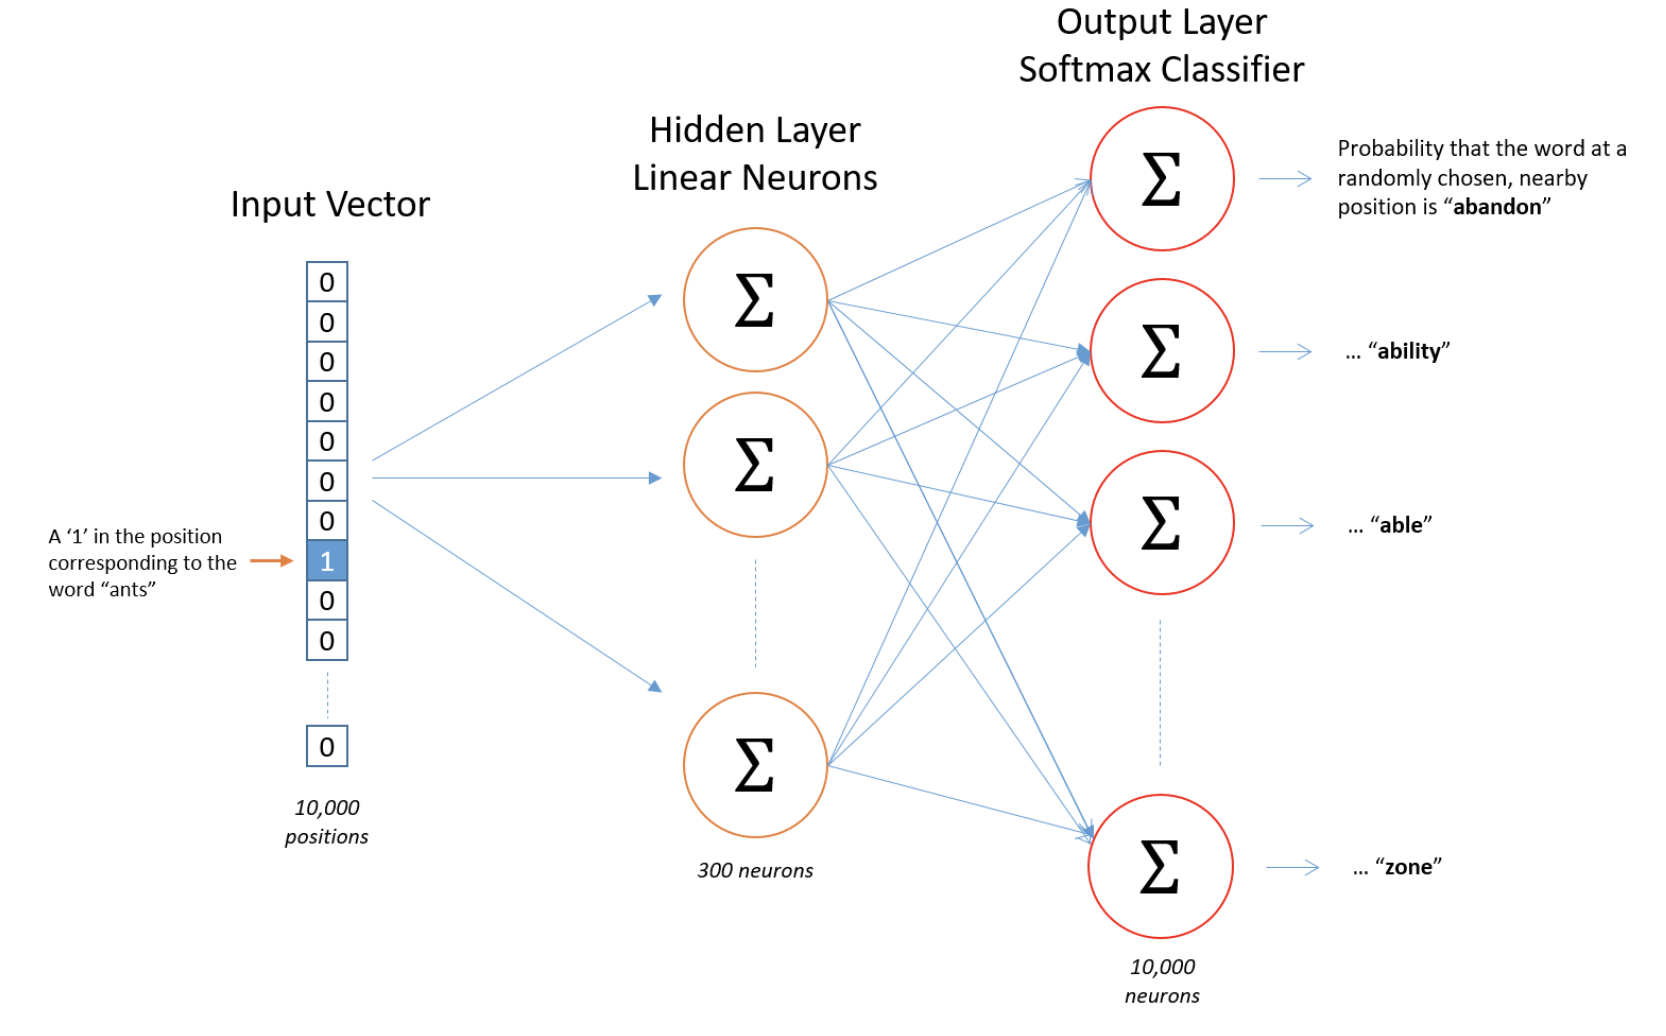
The input words are passed in as one-hot encoded vectors. This will go into a hidden layer of linear units, then into a softmax layer. We'll use the softmax layer to make a prediction like normal.

The idea here is to train the hidden layer weight matrix to find efficient representations for our words. This weight matrix is usually called the embedding matrix or embedding look-up table. We can discard the softmax layer becuase we don't really care about making predictions with this network. We just want the embedding matrix so we can use it in other networks we build from the dataset.

## Embedding
The embedding matrix has a size of the number of words by the number of neurons in the hidden layer. So, if you have 10,000 words and 300 hidden units, the matrix will have size $10,000 \times 300$. Remember that we're using one-hot encoded vectors for our inputs. When you do the matrix multiplication of the one-hot vector with the embedding matrix, you end up selecting only one row out of the entire matrix:
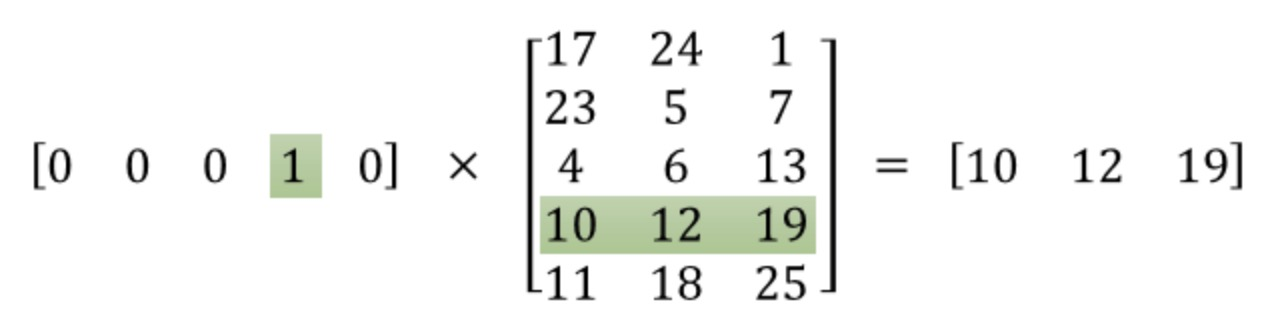
You don't actually need to do the matrix multiplication, you just need to select the row in the embedding matrix that corresponds to the input word. Then, the embedding matrix becomes a lookup table, you're looking up a vector the size of the hidden layer that represents the input word.

In [31]:
# We are trying to reduce the dimensions of our words down to 2D so we can easily visualize
encoding_dimension_size = 2

# Build the nueral network
model = keras.Sequential([
  layers.Dense(encoding_dimension_size, activation='relu', input_shape=(vocab_size,)),
  layers.Dense(vocab_size, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 11)                33        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(inputs,
                    outputs,
                    epochs=5,
                    batch_size=512,
                    validation_split=0.01)

Train on 35 samples, validate on 1 samples
Epoch 1/5
35/35 [==============================] - 0s 12ms/sample - loss: 0.3065 - accuracy: 0.9091 - val_loss: 0.3123 - val_accuracy: 0.9091
Epoch 2/5
35/35 [==============================] - 0s 308us/sample - loss: 0.3065 - accuracy: 0.9091 - val_loss: 0.3123 - val_accuracy: 0.9091
Epoch 3/5
35/35 [==============================] - 0s 358us/sample - loss: 0.3064 - accuracy: 0.9091 - val_loss: 0.3123 - val_accuracy: 0.9091
Epoch 4/5
35/35 [==============================] - 0s 334us/sample - loss: 0.3063 - accuracy: 0.9091 - val_loss: 0.3123 - val_accuracy: 0.9091
Epoch 5/5
35/35 [==============================] - 0s 389us/sample - loss: 0.3062 - accuracy: 0.9091 - val_loss: 0.3123 - val_accuracy: 0.9091


In [33]:
e = model.layers[0]
weights = e.get_weights()
print(weights)
lookup = list(map(lambda s: {'name':s[0],'x':s[1][0],'y':s[1][1]}, zip(all_unique_words, weights)))
print(lookup)

[array([[-0.42724082,  0.09292088],
       [ 0.5963964 ,  0.33292174],
       [-0.40558156,  0.43063626],
       [-0.3727262 , -0.46931732],
       [ 0.3435794 , -0.12663513],
       [-0.15410584, -0.0209704 ],
       [-0.35189155, -0.05311936],
       [ 0.13535517,  0.23322621],
       [ 0.03440864, -0.20604134],
       [-0.15192437,  0.46977353],
       [ 0.30942968, -0.62726665]], dtype=float32), array([-0.00499459, -0.00499432], dtype=float32)]
[{'name': 'prince', 'x': array([-0.42724082,  0.09292088], dtype=float32), 'y': array([0.5963964 , 0.33292174], dtype=float32)}, {'name': 'woman', 'x': -0.004994595, 'y': -0.004994317}]


# 6 机器学习项目搭建

## 6.1 词向量训练
### gensim

In [34]:
import pandas as pd
from collections import defaultdict
from gensim.models import Word2Vec
from gensim.models.fasttext import FastText
from gensim.models.word2vec import LineSentence
from gensim.models.keyedvectors import KeyedVectors

def build_dataset(path):
    print('Read data, path:{0}'.format(path))
    train = pd.read_csv(path, encoding='utf-8')
    lines = []
    for k in ['Question', 'Dialogue', 'Report']:
        a = list(train[k].values)
        print(a)
        
        b = [i.split(' ') for i in a]
        lines.extend(b)

    return lines

In [35]:
train_seg_path = "/Users/vc3vc3/Documents/auto_master_qa/datasets/train_set.seg.csv"
train_texts = build_dataset(train_seg_path)
print(train_texts)

Read data, path:/Users/vc3vc3/Documents/auto_master_qa/datasets/train_set.seg.csv
['方向机 重 助力 泵 方向机 换', '奔驰 ML500 排气 凸轮轴 调节 错误', '2010 款 宝马 X1 2011 年 出厂 2.0 排量 通用 6 L45 变速箱 原地 换挡 位 PRND 车辆 闯动 行驶 升降 档 正常 4 轮离 换挡 冲击 感 更换 变速箱 油 12 L 改变 试 一辆 2014 年 进口 X1 原地 换挡 位 冲击 感 情况 问题', '3.0 V6 发动机 号 位置 照片 最好', '2012 款 奔驰 c180 维修保养 动力 值得 拥有', '科鲁兹 变速箱 旁边 漏 机油', '知道 车子 断开 电瓶 电源 之后 不要 做 节气门 防盗 音响 重置 节气门 重置 是不是 车型 打开 电源 启动 车子 油门 踩 到底 五秒 重复 几次 设备 密码 行 是不是', '昌河 Q35 音响 拆装', '长安 35 朝阳 轮胎 不要 里面 钢圈 钢圈 钱 外面 换 钱', '吉利 远景 外球 笼上 螺丝 顺时针 拧下来 反', '五菱 光 6376 nf 装 铁将军 防盗器 五线 马达 白褐 两根 信号线 接到 地方 想 实现 一控 三 马达', '丰田 花冠 行驶 十万 公里 皮带 要换', '大师 新 时代 全顺 中 门板 手 钱 右门 玻璃 升降 开关 钱', '发动机 工作 状态 踩 离合 感觉 有点 震脚 沙子 是不是 分离 轴承 问题 车速 达到 120 左右 感觉 车 抖 是不是 半轴 问题', '你好 想 咨询 一下 奇瑞 瑞虎 5 8 位 安全 码 PIN 安全 码 谢谢', '最近 几天 后视镜 eco 图标 亮 听说 节能 模式 车上 没有 功能 请问 原因 关闭', '长安 铃木 起步 熄火 刹车 熄火 处理', '请问 电动 座椅 调至 最低 觉得 高 人工 降低 高度', '宝马车 方法 知道 具体位置 喝酒 喝多 车子 知道 停', '换 长城 M2 发动机 钱', '请问 大师 现代 瑞 纳加 美国 狼头 机油 5 W30 狼头 机油', '凌度 行车 记录仪 河源 安装 点', '荣威 350 10 年 车 现在 行驶 过程 中 听到

In [36]:
def build(train_vocab, out_path=None, sentence_path='',
          w2v_bin_path="w2v.bin", min_count=1, col_sep='\t'):
#     sentences = extract_sentence(train_seg_path, test_seg_path, col_sep=col_sep)
#     save_sentence(sentences, sentence_path)
    print('train w2v model...')
    # train model
    w2v = FastText(sg=1, sentences=train_vocab,
                   size=256, window=5, min_count=min_count, iter=40)
    w2v.wv.save_word2vec_format(w2v_bin_path, binary=True)
    print("save %s ok." % w2v_bin_path)
    # test
    sim = w2v.wv.similarity('大师几笔', '技师')
    print('大 vs 小 similarity score:', sim)


In [37]:
build(train_texts)

train w2v model...
save w2v.bin ok.
大 vs 小 similarity score: 0.08460836


/Users/vc3vc3/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


fasttext在输入中加入了unigram，bigram，很好的解决了未登录词（OOV--out-of-vocabulary）问题

## 6.2 工程项目代码结构


In [ ]:
print('\n'.join([''.join([('Love'[(x - y) % len('Love')] if ((x * 0.05) ** 2 + (y * 0.1) ** 2 - 1) ** 3 - 
                (x * 0.05) ** 2 * (y * 0.1) ** 3 <= 0 else ' ') for x in range(-30, 30)])
                 for y in range(30, -30, -1)]))
